### Task : Multiple Regression
#### Input Features (Predictor Variables) : sepal length (cm), sepal width (cm), petal length (cm)
#### Output (Response Variables) : petal width (cm)

### Importing the necessary modules

In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing, metrics, base, datasets, pipeline

### Collecting, Analyzing and Visualizing the data

In [3]:
data = datasets.load_iris()

print(dir(data))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [6]:
# Creating a data frame (for analysis)

df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [20]:
# Checking for null values

any(df.isna().sum())

False

In [21]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [23]:
# Correlation Matrix (Pearson Correlation Co-efficient)

corr_matrix = df.corr()
corr_matrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [25]:
corr_matrix[target].sort_values(ascending = False)

petal width (cm)     1.000000
petal length (cm)    0.962865
sepal length (cm)    0.817941
sepal width (cm)    -0.366126
Name: petal width (cm), dtype: float64

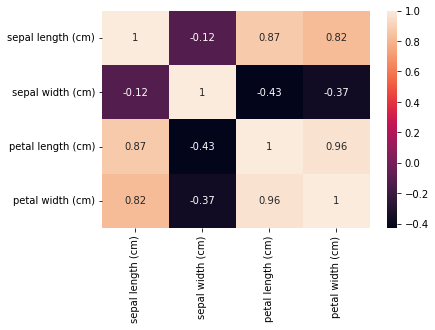

In [24]:
sns.heatmap(corr_matrix, annot = True)
plt.show()

In [11]:
num_attr = df.columns
target = df.columns[-1]

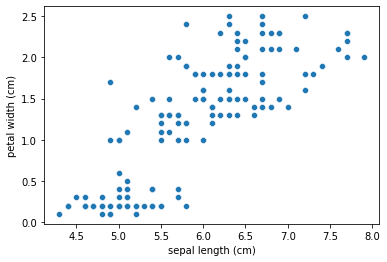

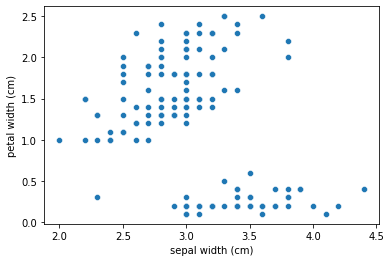

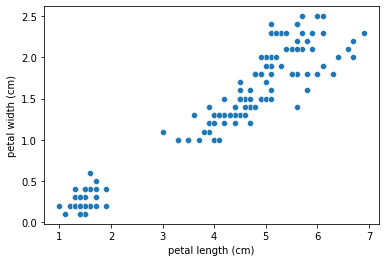

In [28]:
# Scatter Plot

for var in num_attr[:-1]:
    sns.scatterplot(x = var, y = target, data = df)
    plt.show()

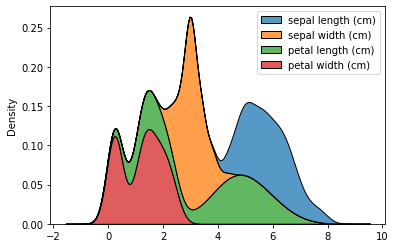

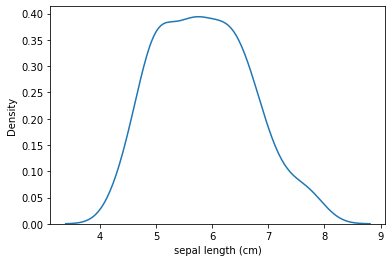

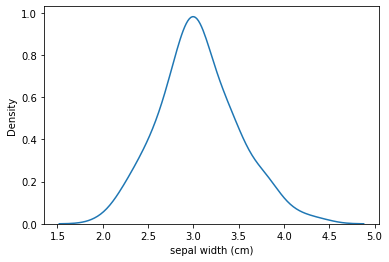

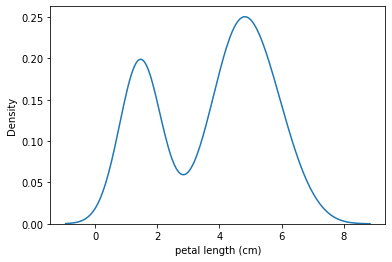

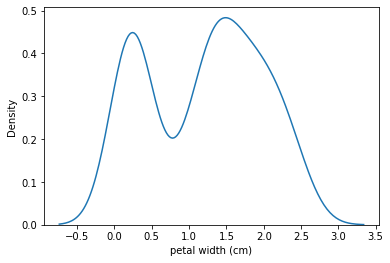

In [72]:
# Density Plot

sns.kdeplot(data = df, multiple = 'stack')
plt.show()

for var in num_attr:
    sns.kdeplot(x = var, data = df)
    plt.show()

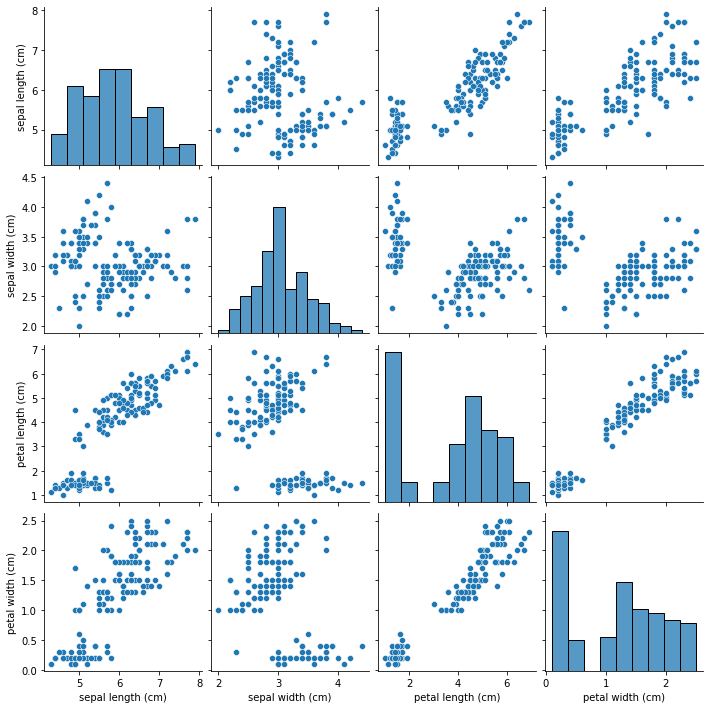

In [30]:
sns.pairplot(df)
plt.show()

### Data Preprocessing and Preparation

In [45]:
# Creating a data transformation pipeline for feature scaling

p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler())
])

In [35]:
X = data.data[:, :-1]
y = data.data[:, -1]

print(X.shape, y.shape)

(150, 3) (150,)


In [46]:
# Splitting data into testing and training sets

train_set, test_set = model_selection.train_test_split(df.values, test_size = 0.2, random_state = 3)

In [48]:
print(train_set.shape, test_set.shape)

(120, 4) (30, 4)


In [122]:
# Scaling the features

train_set_scaled = p.fit_transform(train_set)
test_set_scaled = p.fit_transform(test_set)

X_train = train_set_scaled[:, :-1]
y_train = train_set_scaled[:, -1]

X_test = test_set_scaled[:, :-1]
y_test = test_set_scaled[:, -1]

### Training the model and Evaluating it's performance

#### Normal Equation (Closed Form Equation)

In [107]:
n = X_train.shape[0]

X_train_ = np.c_[np.ones((n, 1)), X_train]
X_t = X_train_.T

intercept, *coef = np.linalg.inv(np.dot(X_t, X_train_)).dot(np.dot(X_t, y_train.reshape(-1, 1)))

intercept, coef

(array([-2.63992648e-16]),
 [array([-0.28115282]), array([0.12292738]), array([1.25996785])])

In [120]:
y_train_pred = np.dot(X_train, coef) + intercept

r2_score = metrics.r2_score(y_train, y_train_pred)

print("Training Score :", r2_score)

Training Score : 0.9437222900802991


#### Sklearn Implementation

In [125]:
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [126]:
# Making Predictions on train set

y_pred = model.predict(X_train)

r2_score = model.score(X_train, y_train)

print("Train Score :", r2_score)

Training Score : 0.9437222900802991


### Validating the model

In [123]:
y_test_pred = np.dot(X_test, coef) + intercept

r2_score = metrics.r2_score(y_test, y_test_pred)

print("Train Score :", r2_score)

Training Score : 0.9177634844413625


In [127]:
r2_score = model.score(X_test, y_test)

print("Test Score :", r2_score)

Testing Score : 0.9177634844413624
